In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [7]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [8]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(7).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.235, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-7 in yolov8:: 100%|██████████| 7460/7460 [00:01<00:00, 4470.46it/s]


# **LOAD THE MODEL**

In [10]:
yolo8_model_detection =YOLO('yolov8s.pt')

# **COPY DATASET IN A NEW DIRECTORY**

In [12]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-7 datasets/sixray100-1

# **TRAIN MODEL**

In [13]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]
2024-01-06 18:04:39,065	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-06 18:04:39,649	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
      1/100      13.5G        1.4      3.914      1.451         97        640: 100%|██████████| 45/45 [00:43<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]

                   all        587       1503      0.643      0.323      0.302      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.6G      1.164       1.39      1.309        113        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.624      0.238      0.196      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.5G      1.203      1.325      1.352        107        640: 100%|██████████| 45/45 [00:40<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        587       1503      0.463      0.179      0.109     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.6G      1.237      1.324      1.383         96        640: 100%|██████████| 45/45 [00:39<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        587       1503      0.396      0.347      0.308      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.3G      1.191      1.205      1.343        116        640: 100%|██████████| 45/45 [00:40<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.515      0.344      0.345      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      15.6G      1.139      1.113      1.311        115        640: 100%|██████████| 45/45 [00:40<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.784      0.355      0.407      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      15.6G      1.118      1.094      1.301        119        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.643      0.543      0.521      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.6G      1.096      1.044      1.281        137        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.695      0.463      0.486      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.6G       1.06     0.9893       1.26        118        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.747      0.491      0.552      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.3G      1.046     0.9609      1.247        145        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.835      0.537        0.6      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.6G      1.039     0.9384      1.245        105        640: 100%|██████████| 45/45 [00:41<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.853      0.531      0.688      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.9G      1.015     0.8931      1.226        150        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.701      0.528      0.561      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.5G      1.011     0.8975      1.219        140        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        587       1503      0.782       0.57      0.627       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.6G     0.9933     0.8584      1.212        132        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.764      0.564       0.64      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.3G     0.9784     0.8552      1.203        100        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.806      0.579      0.643      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.8G     0.9631     0.8252      1.201        112        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.814      0.571      0.621      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.3G     0.9511     0.8109      1.185         98        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.841      0.594      0.658      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.6G       0.95     0.8077       1.19        153        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.836      0.591      0.638      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.5G     0.9365     0.7951      1.186        113        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.816      0.619      0.661      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.5G     0.9374     0.7725      1.179         94        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.823      0.636      0.676      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.5G     0.9217     0.7521      1.167        138        640: 100%|██████████| 45/45 [00:41<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.772      0.623       0.64      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.6G     0.9279     0.7595      1.173        104        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503       0.72      0.662      0.719      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.6G     0.9104     0.7419      1.163        118        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.745      0.733      0.761      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.6G      0.906     0.7247      1.155        123        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.845      0.735      0.798      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.8G        0.9     0.7106      1.151        106        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.847      0.663      0.704      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.6G     0.8889     0.6984      1.147        123        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.798      0.647      0.748      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      15.6G     0.8658     0.6839      1.133        123        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.875      0.648      0.734      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.6G     0.8606     0.6827       1.13         85        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503       0.82      0.666      0.697      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.6G     0.8761     0.6845       1.14        119        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.845      0.771      0.791      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.6G     0.8597     0.6657      1.127        138        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        587       1503      0.822      0.769      0.788      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.6G     0.8413     0.6432      1.114        100        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.871      0.737      0.784      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.9G     0.8491     0.6586      1.121        125        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        587       1503      0.873      0.649      0.749      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.5G     0.8436     0.6517      1.117        117        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.892      0.659      0.739      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.3G     0.8414     0.6542      1.123        151        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        587       1503      0.705      0.786      0.751      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.3G     0.8304     0.6353      1.106        138        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        587       1503      0.852      0.771        0.8      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.5G     0.8181     0.6168        1.1        131        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.884       0.67      0.713      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.6G      0.824     0.6224      1.105        112        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.806      0.798      0.808      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.3G     0.8204     0.6205      1.108         91        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.846      0.701      0.723       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.5G     0.8079     0.6037      1.093         96        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.661      0.772      0.769      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.6G     0.8053     0.6008        1.1        125        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.755      0.765      0.757      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.5G     0.8046     0.5981      1.092        131        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.874      0.729      0.807      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.6G     0.7991     0.6012       1.09         96        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]

                   all        587       1503      0.887      0.702      0.747      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.8G     0.7879     0.5873      1.081        127        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.692      0.801      0.774        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.3G      0.776     0.5821       1.08        106        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.926      0.682       0.74      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.3G     0.7836     0.5823      1.088        107        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.772       0.81      0.804      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.5G     0.7761     0.5694      1.078        148        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.643      0.838      0.809       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.6G     0.7795     0.5617       1.08        117        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        587       1503      0.851      0.787      0.817      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.6G     0.7806     0.5714      1.088        131        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.676      0.812      0.768      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.6G     0.7685      0.567      1.077         94        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.803      0.775      0.767      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      15.6G     0.7674     0.5589      1.073        106        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.889      0.781       0.82      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.6G      0.752     0.5474      1.062        107        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        587       1503      0.884      0.776      0.829      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.3G     0.7508     0.5353      1.064        108        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503        0.7      0.811      0.816       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.5G     0.7471     0.5457      1.066        125        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        587       1503       0.89       0.76      0.799       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.9G     0.7426     0.5267      1.055        110        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.891      0.776      0.804      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.6G     0.7424     0.5362       1.06        107        640: 100%|██████████| 45/45 [00:41<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        587       1503      0.863       0.81      0.865      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.6G     0.7323     0.5326      1.059        120        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.873      0.776      0.868      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.6G      0.734     0.5244      1.054        136        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.756      0.889      0.825      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.6G     0.7352     0.5246      1.057         86        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        587       1503       0.85      0.902      0.913      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.3G     0.7177     0.5099      1.047        117        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.704      0.825      0.766       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.6G     0.7218     0.5127      1.049        117        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        587       1503      0.909      0.774      0.831      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.5G     0.7145      0.504       1.04        100        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.848      0.811      0.839      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.6G      0.713     0.5054      1.043        153        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.792      0.818      0.816      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.5G     0.7093     0.5024      1.041        124        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.871      0.801      0.829      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.6G     0.7039     0.5032       1.04        154        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.766      0.837      0.824      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.7G     0.6928     0.4864      1.032        116        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        587       1503      0.874      0.803      0.825      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.6G     0.6899     0.4839      1.035        115        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.874      0.791      0.818      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.6G     0.6793      0.481      1.024        132        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.899      0.801      0.837      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.5G     0.6917     0.4869      1.037        115        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        587       1503      0.848      0.819      0.815      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.5G     0.6878     0.4764      1.027        145        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.869      0.799      0.843      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      15.6G     0.6885     0.4837      1.032         74        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.891      0.781      0.832      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.9G     0.6824     0.4759      1.029        110        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.855      0.828      0.827      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      15.6G     0.6722     0.4696      1.022        135        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        587       1503      0.851      0.841      0.842      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      15.6G     0.6776      0.474      1.028        127        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.888      0.828      0.839      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.6G     0.6685     0.4669      1.022        114        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.908      0.801       0.84      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.3G     0.6675     0.4664      1.017        135        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        587       1503      0.846      0.829      0.837      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.5G     0.6634     0.4622      1.019        132        640: 100%|██████████| 45/45 [00:41<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        587       1503      0.836      0.833      0.835      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.6G      0.657     0.4535      1.011        138        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.703      0.843      0.782      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.6G     0.6566     0.4511      1.013        112        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.892      0.806      0.851      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      15.6G     0.6628     0.4636      1.018        123        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.902       0.79      0.835      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.5G     0.6398     0.4454      1.007        116        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.858      0.811      0.862      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.5G     0.6424     0.4419       1.01        116        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.912      0.796      0.832       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.5G     0.6423      0.444      1.009        130        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        587       1503      0.901      0.809      0.872      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.6G     0.6344     0.4372     0.9986        136        640: 100%|██████████| 45/45 [00:41<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        587       1503      0.851       0.83      0.828      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.9G     0.6345     0.4348      1.001        127        640: 100%|██████████| 45/45 [00:41<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.884      0.813      0.837      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.5G     0.6361     0.4384      1.005        135        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.725      0.841      0.847        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      15.6G     0.6354     0.4485      1.011         93        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        587       1503      0.885      0.788      0.842      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      15.6G     0.6211     0.4296     0.9959        107        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        587       1503      0.899      0.812      0.849      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.6G     0.6192     0.4232     0.9932        108        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.881      0.814      0.844      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      15.6G     0.6246     0.4273      1.002        128        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.908      0.813      0.844      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      15.6G     0.6095     0.4205     0.9938        111        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.883      0.814      0.835      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.7G     0.5126     0.3114     0.9409         59        640: 100%|██████████| 45/45 [00:43<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        587       1503      0.876      0.828      0.866      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.4G     0.5158     0.3105     0.9491         56        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        587       1503      0.894      0.821      0.849      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.5G     0.5066     0.3083     0.9428         54        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        587       1503      0.876      0.826      0.861       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.4G     0.4987     0.2999     0.9373         67        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        587       1503      0.896      0.826       0.85      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.7G     0.4911     0.2946     0.9385         51        640: 100%|██████████| 45/45 [00:40<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        587       1503      0.879      0.823      0.843      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.4G     0.4863     0.2944     0.9287         54        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        587       1503      0.886      0.809      0.844      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.4G     0.4872     0.2943     0.9329         64        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        587       1503      0.902      0.814      0.843      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.8G     0.4781     0.2913     0.9257         64        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        587       1503      0.891       0.82      0.843      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.4G     0.4784     0.2867     0.9262         64        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        587       1503      0.894      0.821      0.846      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.5G     0.4738     0.2839      0.923         62        640: 100%|██████████| 45/45 [00:40<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        587       1503      0.888      0.822      0.847      0.711



100 epochs completed in 1.301 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 22.5MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 22.5MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.76s/it]


                   all        587       1503       0.85      0.901      0.913      0.732
                   Gun        587        739      0.958      0.988      0.993      0.844
                Hammer        587          2          1      0.953      0.995      0.945
                 Knife        587        429      0.879      0.909      0.939      0.705
                Pliers        587        118      0.926      0.949      0.969       0.77
              Scissors        587         24      0.548      0.708      0.664      0.383
                Wrench        587        191      0.789      0.901      0.919      0.741
Speed: 1.4ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7817d80e3100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **VAIDATE MODEL**

In [14]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


                   all        587       1503      0.885      0.888      0.914      0.723
                   Gun        587        739      0.967      0.986      0.993      0.846
                Hammer        587          2          1      0.961      0.995      0.895
                 Knife        587        429      0.935      0.886      0.941      0.705
                Pliers        587        118      0.958      0.941       0.97      0.771
              Scissors        587         24      0.606      0.667      0.668       0.38
                Wrench        587        191      0.845       0.89      0.918      0.741
Speed: 1.4ms preprocess, 9.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.84594,      0.8955,     0.70518,     0.77148,      0.3797,     0.74146])

# **TESTING MODEL**


image 1/296 /kaggle/working/weapon_detection-7/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 16.4ms
image 2/296 /kaggle/working/weapon_detection-7/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 15.8ms
image 3/296 /kaggle/working/weapon_detection-7/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 13.2ms
image 4/296 /kaggle/working/weapon_detection-7/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 12.5ms
image 5/296 /kaggle/working/weapon_detection-7/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 12.5ms
image 6/296 /kaggle/working/weapon_detection-7/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 12.6ms
image 7/296 /kaggle/working/weapon_detection-7/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 12.5ms
image 8/296 /kaggle/w

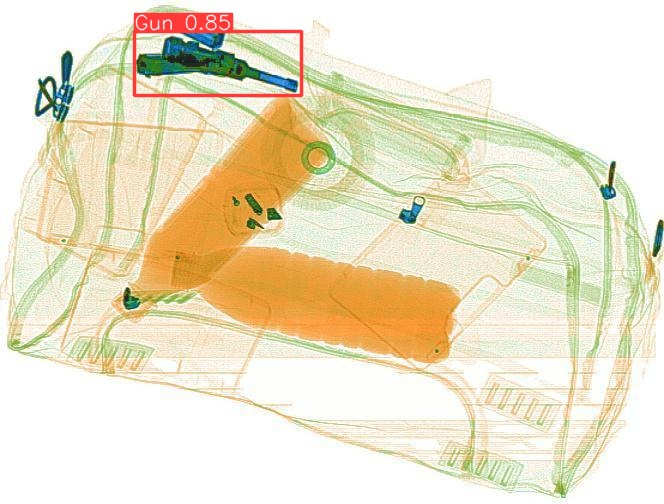

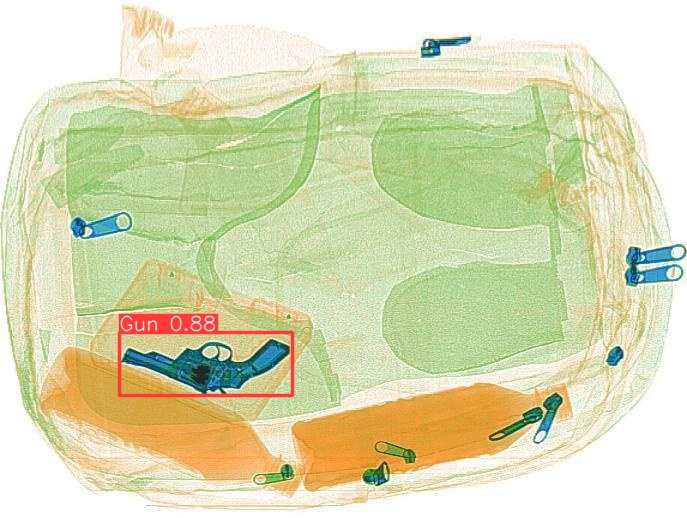

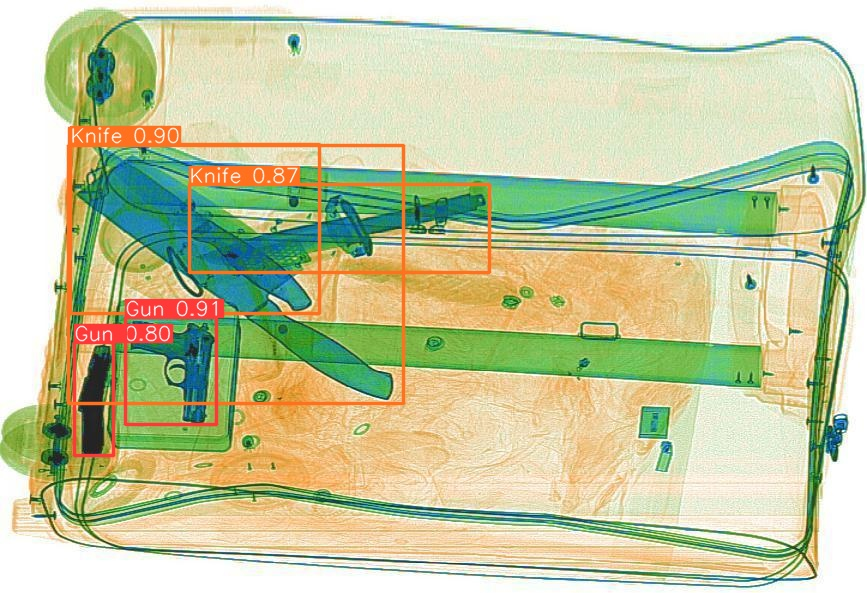

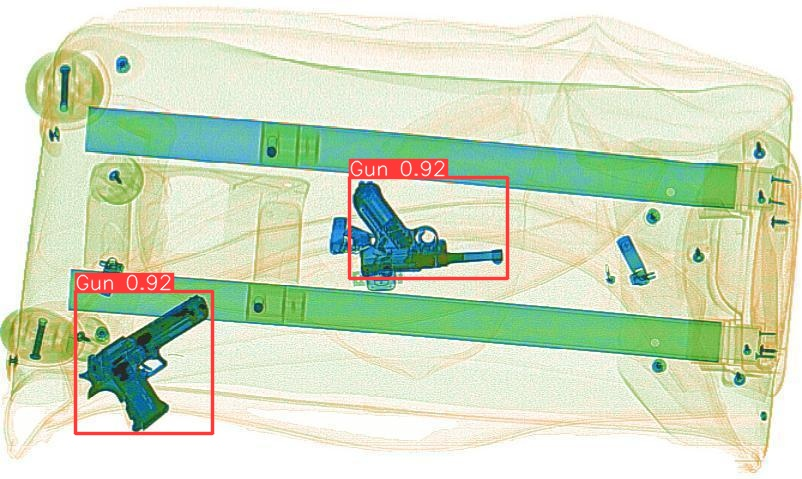

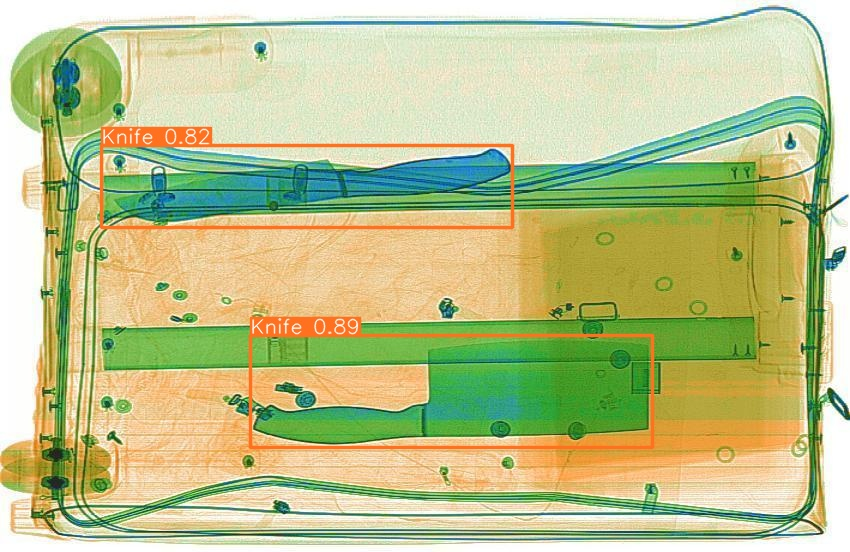

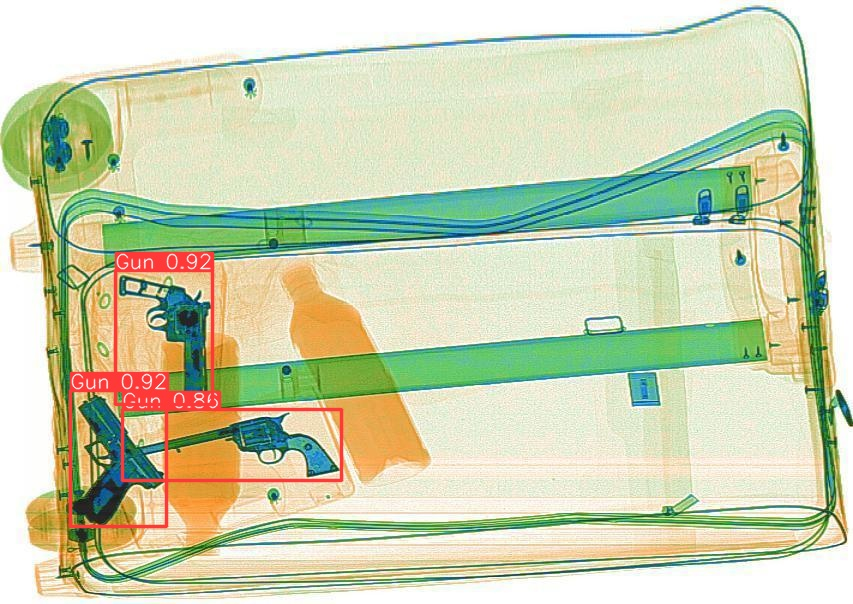

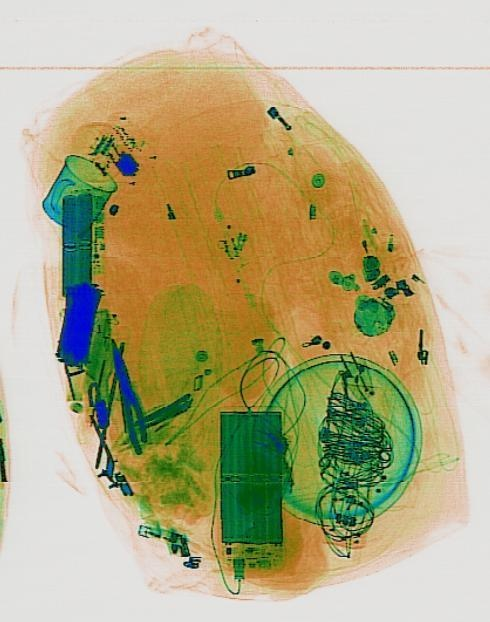

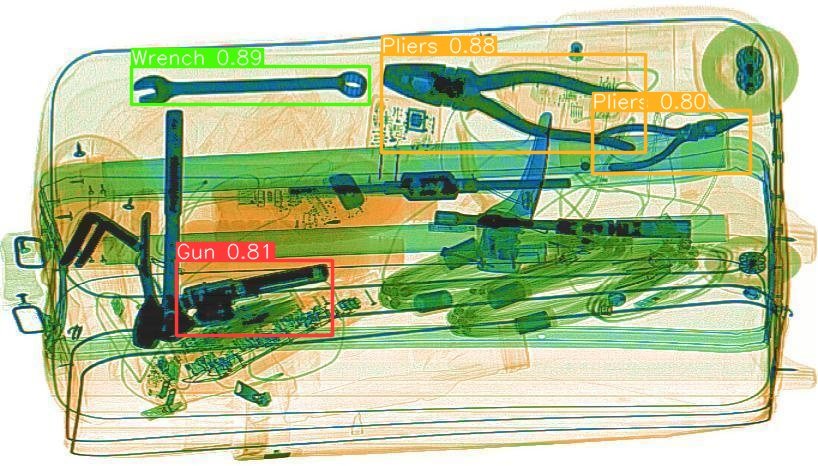

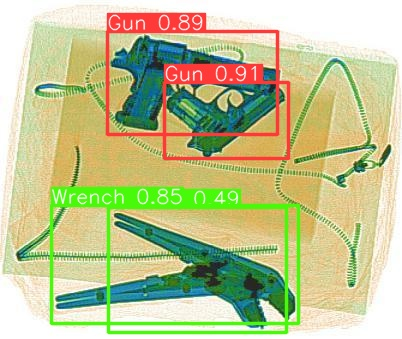

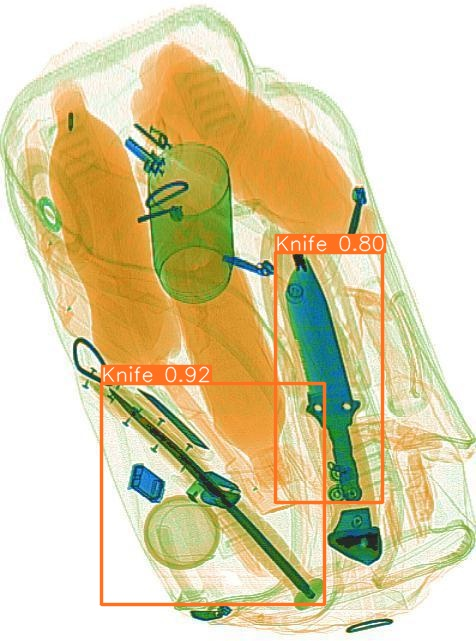

In [16]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-7/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-10:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [17]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5314.0/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (667.13s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       21.5                0.726                   12.24
1             TorchScript       ✅       42.9                0.735                    8.82
2                    ONNX       ✅       42.7                0.735                   11.62
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       53.8                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      106.7                0.735                   20.25
7     TensorFlow GraphDef       ✅       42.7                0.735                   19.87
8         TensorFlow L

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,21.5,0.726,12.24
1,TorchScript,✅,42.9,0.735,8.82
2,ONNX,✅,42.7,0.735,11.62
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,53.8,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,106.7,0.735,20.25
7,TensorFlow GraphDef,✅,42.7,0.735,19.87
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
